In [ ]:
import pandas as pd

# Загрузка данных из Excel файла
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Вывод первых нескольких строк датафрейма
print(df.head())

# Статистическая информация
print(df.describe())

# Названия столбцов
print("Названия столбцов:", df.columns)

# Названия строк (индексы)
print("Названия строк:", df.index)

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%

<ipython-input-6-d04fef2c967c>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Get a colormap with enough colors


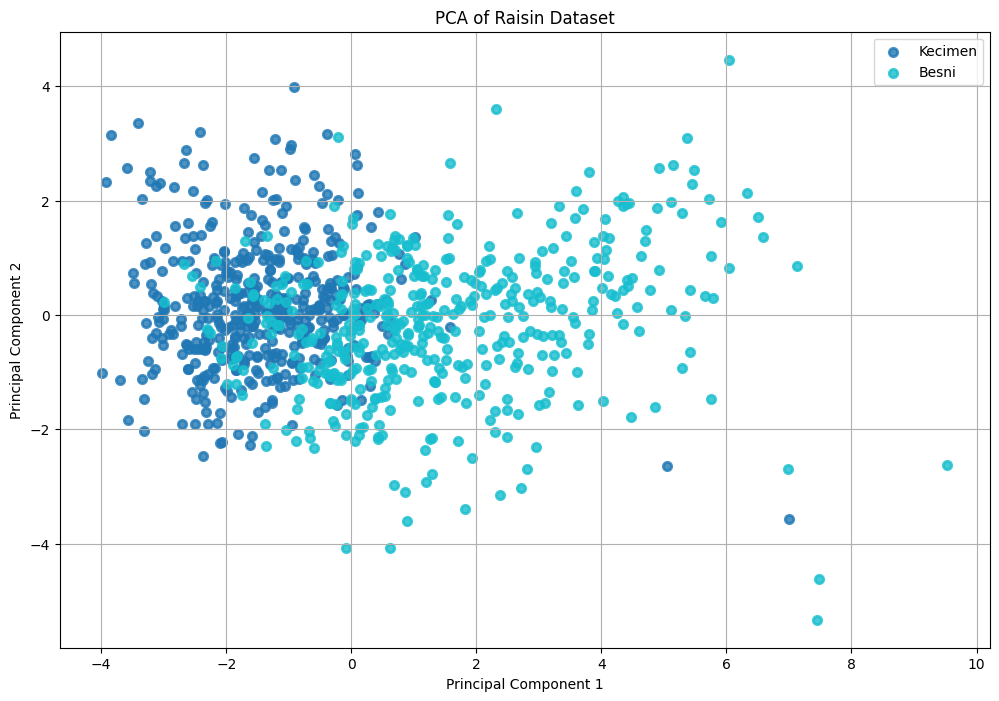

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Step 2: Preprocess the data
# Separate features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_scaled)

# Step 4: Visualize the results
plt.figure(figsize=(12, 8))

# Get unique classes
unique_classes = y.unique()
colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Get a colormap with enough colors

# Create a scatter plot
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0],
        X_new[y == target_name, 1],
        color=colors(i),
        alpha=0.8,
        lw=2,
        label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Raisin Dataset")
plt.grid()
plt.show()

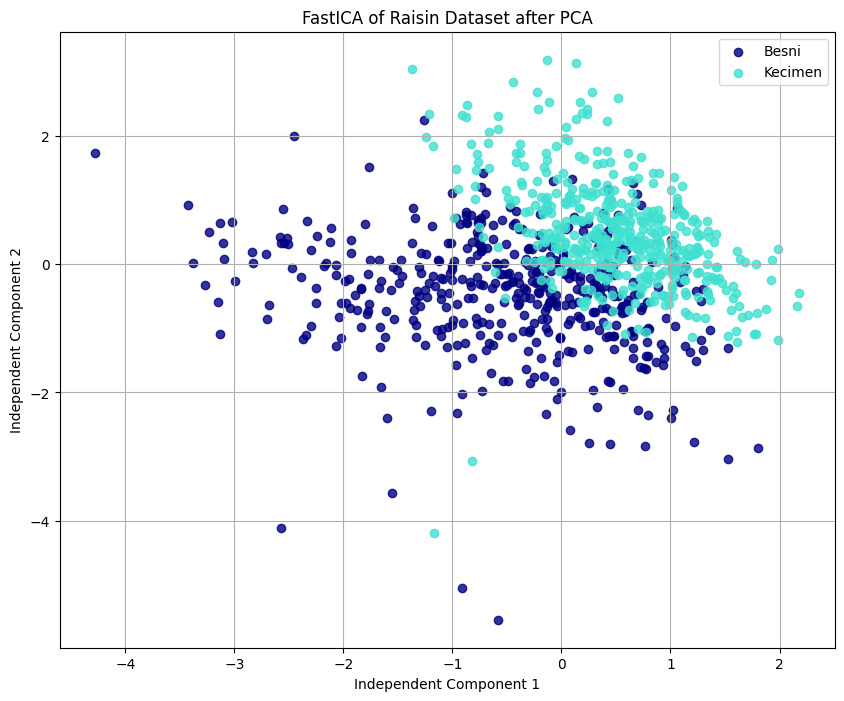

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Загрузка данных
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Отделение фичей и меток классов
X = df.drop(columns=['Class'])  # Все, кроме столбца Class
y = df['Class']  # Целевая переменная

# Преобразование классов в числовые метки
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Преобразуем классы в числа

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA для уменьшения размерности до 5 компонент
pca = PCA(n_components=5)  # Уменьшаем до 5 компонент
X_pca = pca.fit_transform(X_scaled)

# Применение FastICA для уменьшения размерности до 2 компонент
fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X_pca)

# Построение графика
plt.figure(figsize=(10, 8))

# Цвета для классов
colors = ['navy', 'turquoise']

# Построение scatter plot для каждого класса
for color, i, target_name in zip(colors, [0, 1], label_encoder.classes_):
    plt.scatter(X_new[y_encoded == i, 0], X_new[y_encoded == i, 1],
                color=color, alpha=0.8, label=target_name)

# Настройки графика
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('FastICA of Raisin Dataset after PCA')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.grid()
plt.show()

<ipython-input-9-2cd17a38c6a9>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Get a colormap with enough colors


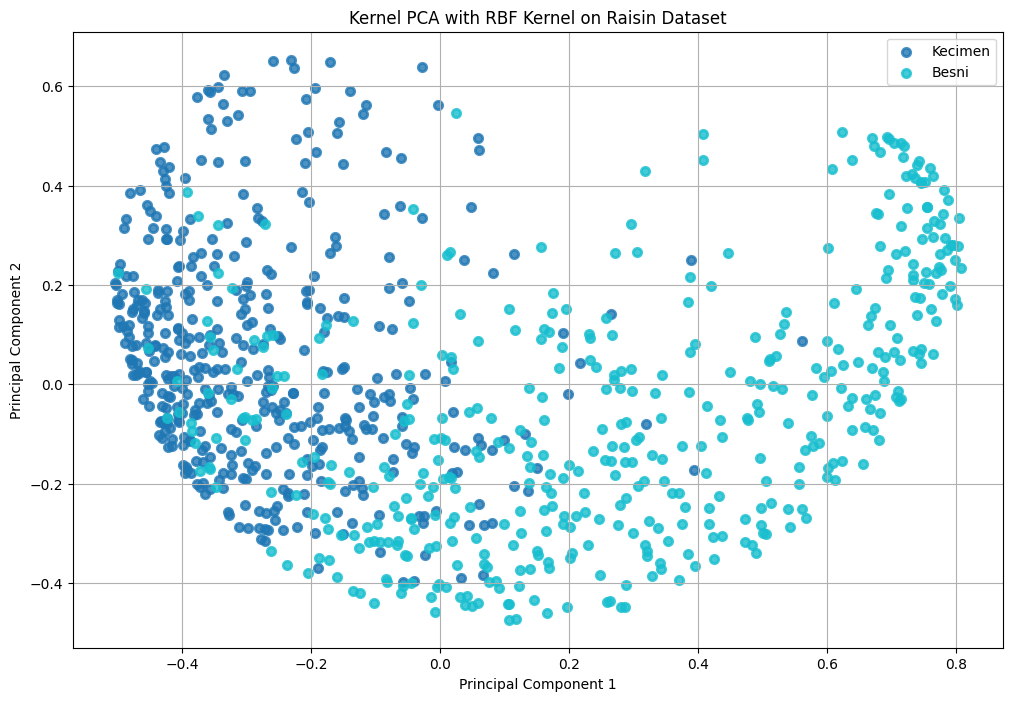

In [ ]:
from sklearn.decomposition import KernelPCA


# Step 2: Preprocess the data
# Separate features and the target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KernelPCA with RBF kernel
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X_scaled)

# Step 5: Visualize the results
plt.figure(figsize=(12, 8))

# Get unique classes
unique_classes = y.unique()
colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Get a colormap with enough colors

# Create a scatter plot
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0],
        X_new[y == target_name, 1],
        color=colors(i),
        alpha=0.8,
        lw=2,
        label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Kernel PCA with RBF Kernel on Raisin Dataset")
plt.grid()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# Step 4: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Fixed random state for reproducibility
X_new = tsne.fit_transform(X_scaled)

# Step 5: Output results
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

Initial Shape of X:  (900, 7)
New Shape of X:  (900, 2)
Kullback-Leibler divergence after optimization:  0.7081010937690735
No. of iterations:  999


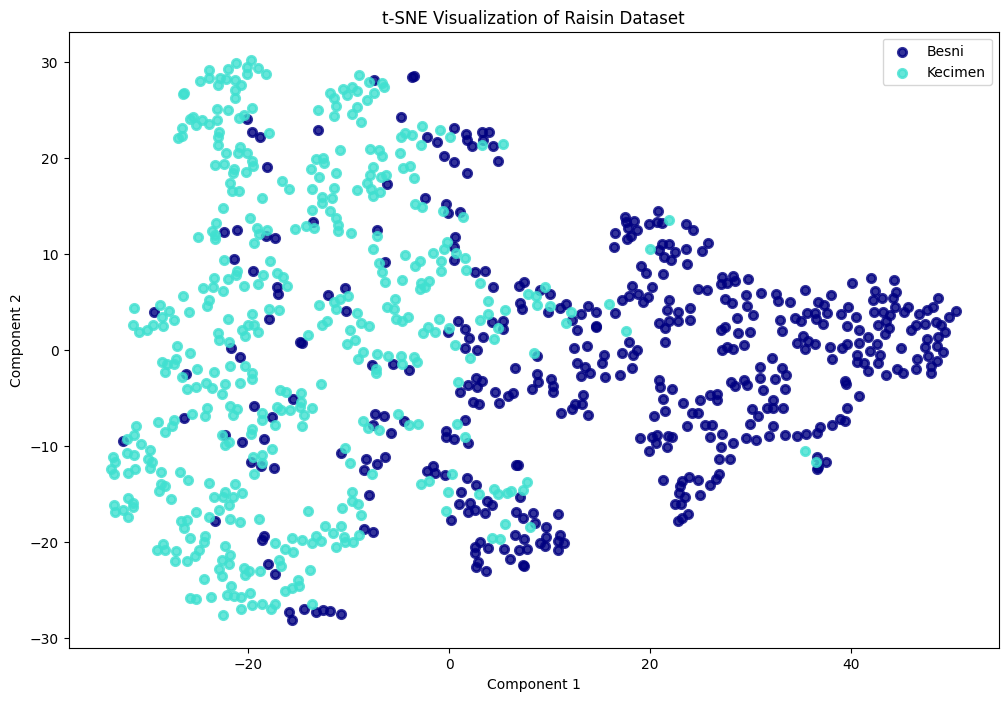

In [ ]:
# Цвета для классов
colors = ["navy", "turquoise"]

# Построение scatter plot для каждого класса
plt.figure(figsize=(12, 8))

for color, i, target_name in zip(colors, [0, 1], label_encoder.classes_):
    plt.scatter(
        X_new[y_encoded == i, 0], X_new[y_encoded == i, 1],
        color=color, alpha=0.8, lw=2, label=target_name
    )

# Добавление легенды и меток осей
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("t-SNE Visualization of Raisin Dataset")
plt.show()

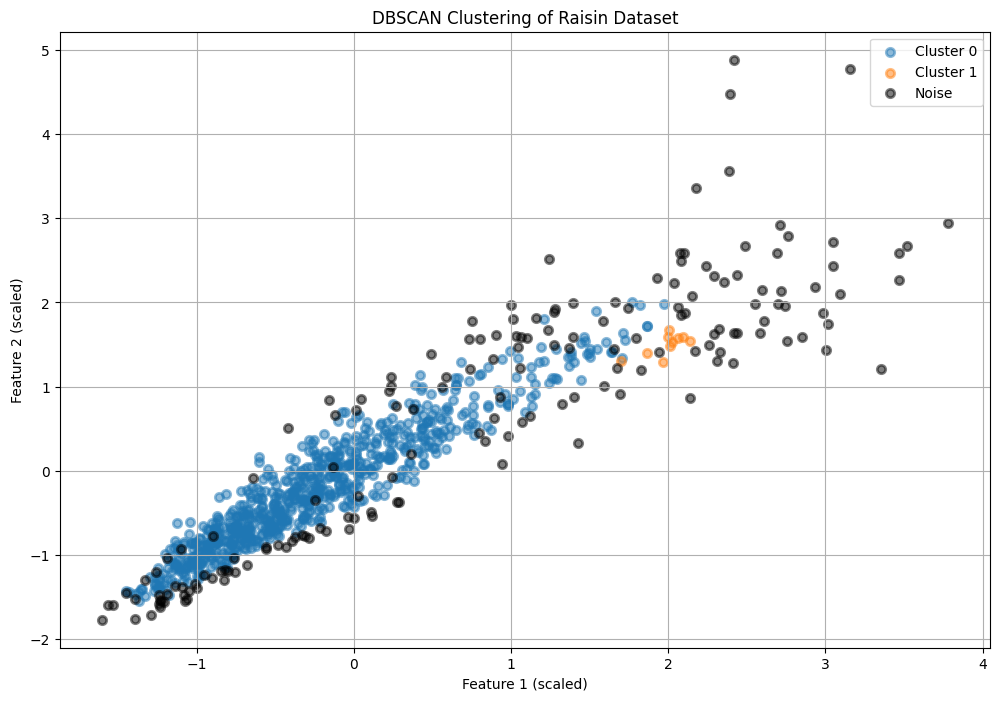

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import v_measure_score

# Step 1: Load the dataset
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Step 2: Preprocess the data
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan_cluster = DBSCAN(eps=0.7, min_samples=10)  # Adjusted parameters
labels = dbscan_cluster.fit_predict(X_scaled)  # Get cluster labels

# Step 5: Plotting the results
plt.figure(figsize=(12, 8))

# Create a color map for clusters
unique_labels = set(labels)
colors = plt.cm.tab10  # Using the new method to get the colormap

# Scatter plot
for label in unique_labels:
    if label == -1:
        color = 'k'  # Black for noise
        label_name = 'Noise'
    else:
        color = colors(label % 10)  # Use modulo to prevent index error (tab10 has 10 colors)
        label_name = f'Cluster {label}'

    plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                color=color, alpha=0.5, lw=2, label=label_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('DBSCAN Clustering of Raisin Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid()
plt.show()

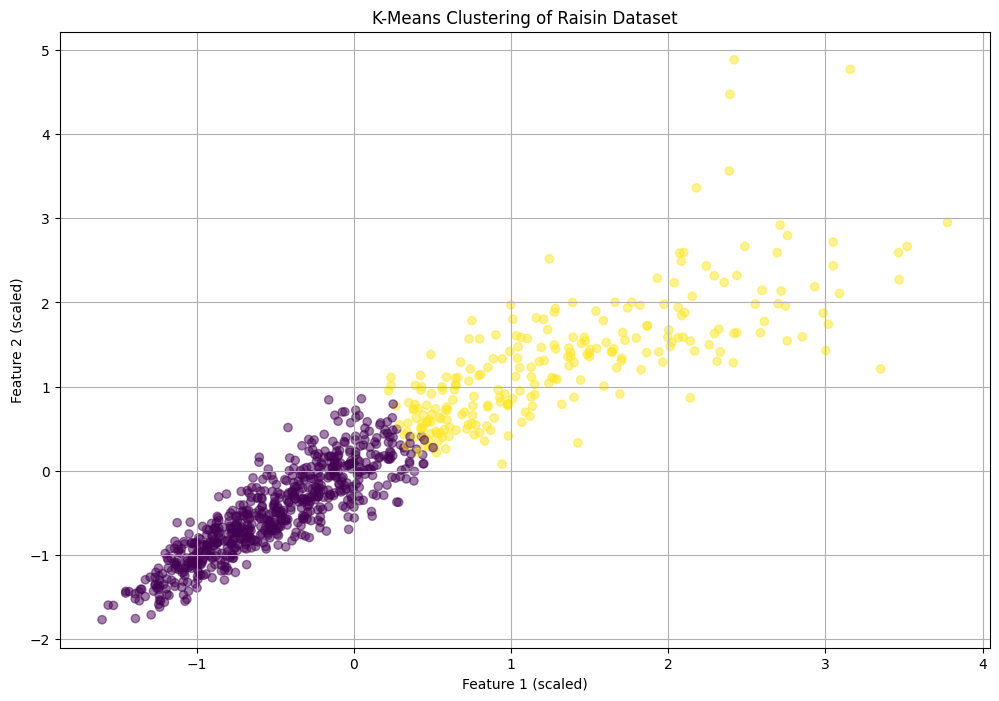

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)  # Укажите количество кластеров
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация результатов K-Means
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Raisin Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid()
plt.show()

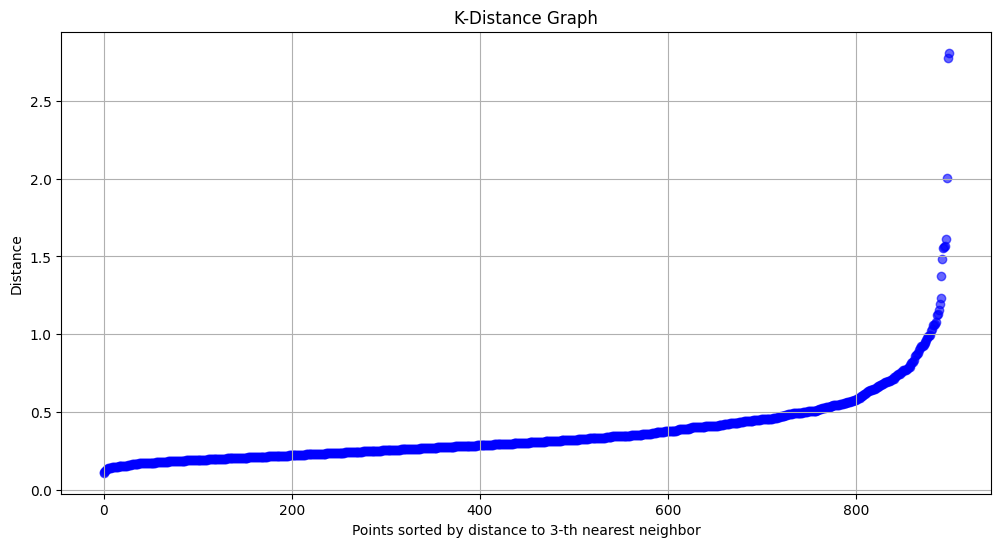

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Step 2: Preprocess the data
X = df.drop(columns=['Class'])  # Features

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features for distance calculations

# Step 4: Set min_samples for NearestNeighbors
min_samples = 3

# Step 5: Fit NearestNeighbors model
knn = NearestNeighbors(n_neighbors=min_samples, metric='l2')  # Using L2 metric (Euclidean distance)
knn.fit(X_scaled)

# Step 6: Calculate distances to the k-nearest neighbors
dists, inds = knn.kneighbors(X_scaled)  # Get distances and indices of neighbors
dists_ar = dists[:, 1:min_samples].mean(axis=1)  # Mean distance to k-nearest neighbors
dists_ar.sort()  # Sort the distances for plotting

# Step 7: Plot the k-distance graph
plt.figure(figsize=(12, 6))
plt.scatter(range(len(dists_ar)), dists_ar, color='blue', alpha=0.6)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(min_samples))
plt.ylabel('Distance')
plt.grid()
plt.show()

Estimated number of clusters: 1
Estimated number of noise points: 311
V-measure = 0.08097363182045063


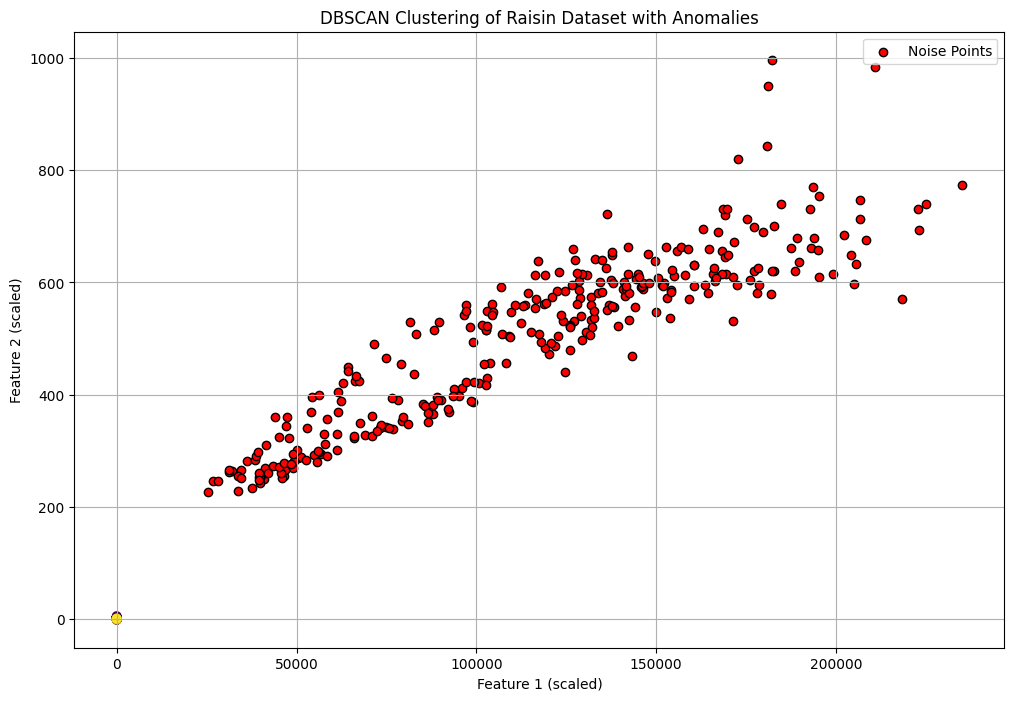

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import v_measure_score

# Step 1: Load the dataset
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Step 2: Preprocess the data
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features for distance calculations

# Step 4: Set min_samples for DBSCAN
min_samples =12

# Step 5: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=min_samples)
pred = dbscan.fit_predict(X_scaled)

# Step 6: Number of Clusters
labels = dbscan.labels_
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % N_clus)

# Step 7: Identify Noise
n_noise = list(labels).count(-1)
print('Estimated number of noise points: %d' % n_noise)

# Step 8: Calculating V-measure
v_measure = v_measure_score(y, labels)
print('V-measure =', v_measure)

# Step 9: Identify anomalous points (class -1)
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.iloc[anom_index]  # Use iloc to get rows from original DataFrame

# Step 10: Plotting the results
plt.figure(figsize=(12, 8))

# Scatter plot for all points colored by cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)

# Highlight noise points in red
plt.scatter(values.iloc[:, 0], values.iloc[:, 1], color='red', label='Noise Points', edgecolor='k')

# Additional plot settings
plt.title('DBSCAN Clustering of Raisin Dataset with Anomalies')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid()
plt.show()

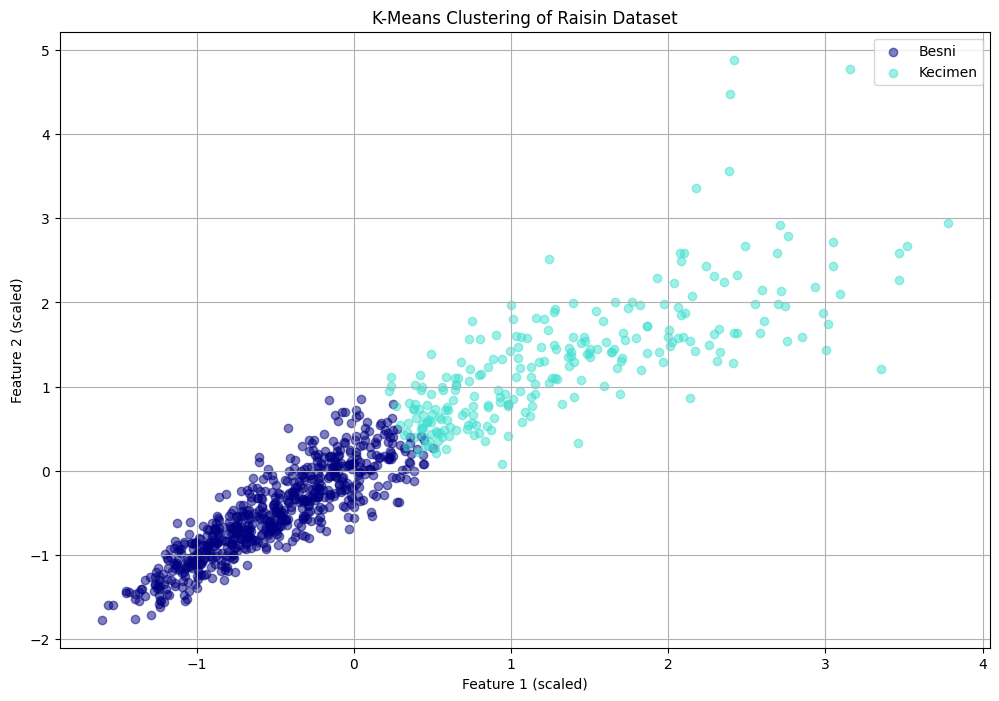

Centroids of clusters:
[[-0.50227972 -0.48894926 -0.42348026 -0.21733391 -0.50069556  0.04568862
  -0.4919882 ]
 [ 1.33532902  1.2998895   1.12583775  0.57779015  1.33111746 -0.12146486
   1.30796864]]

Inertia: 3398.245684163167


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Отделение фичей и меток классов
X = df.drop(columns=['Class'])  # Все, кроме столбца Class
y = df['Class']  # Целевая переменная

# Преобразование классов в числовые метки
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Преобразуем классы в числа

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация результатов K-Means
plt.figure(figsize=(12, 8))

# Цвета для классов
colors = ['navy', 'turquoise']

# Построение scatter plot для каждого кластера
for color, i, target_name in zip(colors, [0, 1], label_encoder.classes_):
    plt.scatter(X_scaled[kmeans_labels == i, 0], X_scaled[kmeans_labels == i, 1],
                color=color, alpha=0.5, label=target_name)

# Настройки графика
plt.title('K-Means Clustering of Raisin Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid()
plt.show()

# Вывод информации о кластерах
print("Centroids of clusters:")
print(kmeans.cluster_centers_)
print("\nInertia:", kmeans.inertia_)